### PROBLEM STATMENT:
Meetings are an essential aspect of collaborative work environments, allowing team members to discuss, share ideas, and make decisions
One significant obstacle faced by meeting organizers and participants is the difficulty in objectively evaluating individual contributions

### APPROACH
Therefore, to solve this issue there is a need for an automated meeting contribution analyzer that can objectively evaluate and analyze the contributions of individual participants
This system  will be capable of accurately assessing various aspects, including active participation, frequency of speaking, contribution quality, and overall impact on the meeting outcomes.

Importing libraries as per our requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

The code you provided is using the librosa.load function to load an audio file named ‘Mixed.wav’ into a NumPy array y and its sampling rate sr. The librosa.load function loads an audio file as a floating point time series. Audio will be automatically resampled to the given rate (default sr=22050). To preserve the native sampling rate of the file, use sr=None1.

The print statements display the shape of the NumPy array y and the value of the sampling rate sr. The shape of y indicates the length of the audio time series, while sr represents the number of samples per second of the audio.

In [10]:
y, sr = librosa.load('Mixed.mp3')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

shape y: (576850,)
sr: 22050


The code you provided is using the plot method of a pandas.Series object to create a line plot of the data in the Series y. The figsize parameter specifies the size of the figure to be created, in this case, 10 inches wide by 5 inches tall. The lw parameter sets the line width of the plot, in this case, 1. The title parameter sets the title of the plot to ‘Raw Audio Example’. The color parameter sets the color of the line to be plotted, in this case, it is set to the first color in the list color_pal. Finally, plt.show() displays the plot.

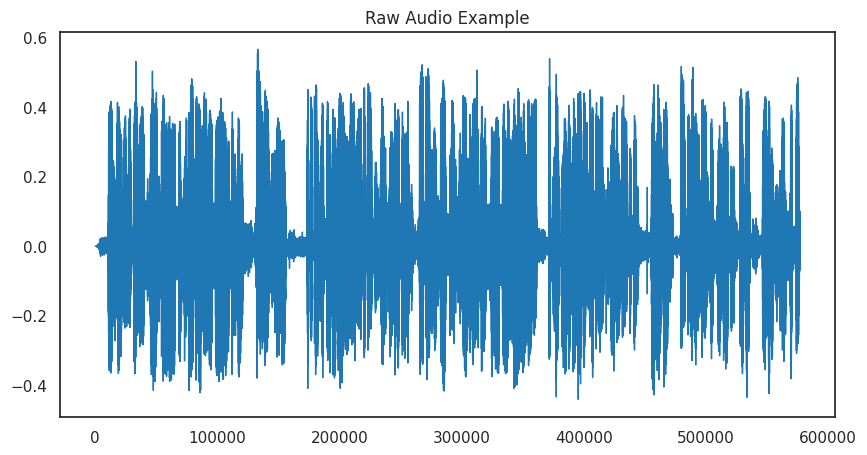

In [11]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

The first line of code you provided uses the librosa.effects.trim function to trim leading and trailing silence from an audio signal y. The top_db parameter specifies the threshold (in decibels) below the reference to consider as silence. In this case, it is set to 20. The function returns two values: y_trimmed, which is the trimmed signal, and _, which is the interval of y corresponding to the non-silent region1.

The rest of the code is similar to the previous example you provided. It creates a line plot of the data in the Series y_trimmed using the plot method of a pandas.Series object. The figsize, lw, title, and color parameters are set in the same way as before, but with a different title (‘Raw Audio Trimmed’) and color (the second color in the list color_pal). Finally, plt.show() displays the plot.

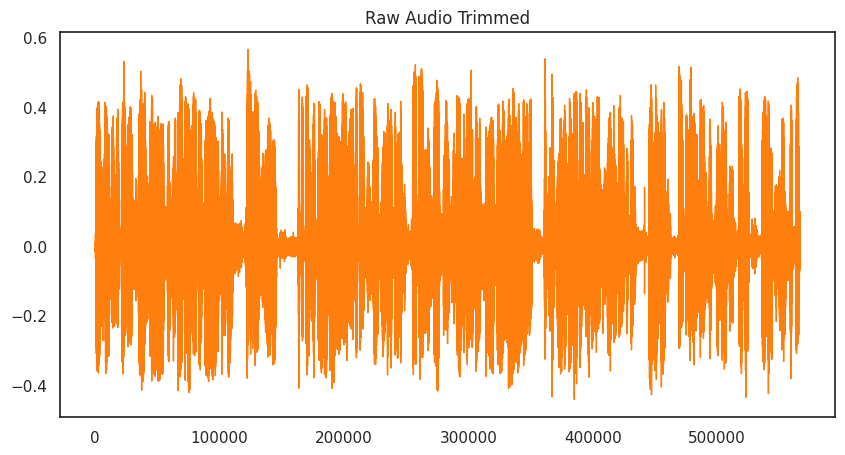

In [12]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed',
                 color=color_pal[1])
plt.show()

The code you provided is creating a line plot of a slice of the data in the Series y using the plot method of a pandas.Series object. The slice is specified by the indexing operation y[30000:30500], which selects the elements of y from index 30000 to index 30500 (not inclusive). The figsize, lw, title, and color parameters are set in the same way as before, but with a different title (‘Raw Audio Zoomed’) and color (the third color in the list color_pal). Finally, plt.show() displays the plot.

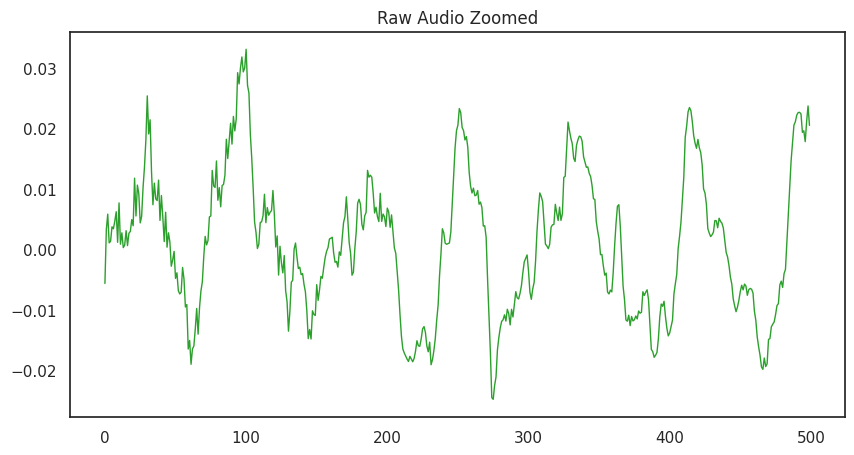

In [13]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed',
                 color=color_pal[2])
plt.show()

The code you provided is using the librosa.stft function to compute the short-time Fourier transform (STFT) of the audio signal y. The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows1.

The result of the STFT is a complex-valued matrix D such that np.abs(D[..., f, t]) is the magnitude of frequency bin f at frame t, and np.angle(D[..., f, t]) is the phase of frequency bin f at frame t. The integers t and f can be converted to physical units by means of the utility functions frames_to_samples and fft_frequencies1.

The next line of code uses the librosa.amplitude_to_db function to convert an amplitude spectrogram to a dB-scaled spectrogram. This function takes as input the magnitude of the STFT, computed using np.abs(D), and a reference value, computed using np.max. The reference value is used to scale the amplitude of the spectrogram relative to the maximum value2.

Finally, the shape of the resulting dB-scaled spectrogram S_db is obtained using the .shape attribute.

In [14]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 1127)

The code you provided is using the librosa.display.specshow function to display a spectrogram of the audio signal y. The first line of code creates a new figure and axes object using the plt.subplots function. The figsize parameter specifies the size of the figure to be created, in this case, 10 inches wide by 5 inches tall.

The librosa.display.specshow function takes as input the dB-scaled spectrogram S_db and displays it using a colormap. The x_axis and y_axis parameters specify the type of axis scaling to use, in this case, ‘time’ for the x-axis and ‘log’ for the y-axis. The ax parameter specifies the axes object on which to draw the spectrogram.

The next line of code sets the title of the plot to ‘Spectogram’ using the set_title method of the axes object. The fontsize parameter specifies the size of the font to use for the title, in this case, 20.

The next line of code adds a colorbar to the figure using the colorbar method of the figure object. The img parameter specifies the image to which the colorbar applies, in this case, the spectrogram displayed by librosa.display.specshow. The ax parameter specifies the axes object on which to draw the colorbar. The format parameter specifies the format string to use when displaying tick labels on the colorbar, in this case, a floating-point number with 2 decimal places.

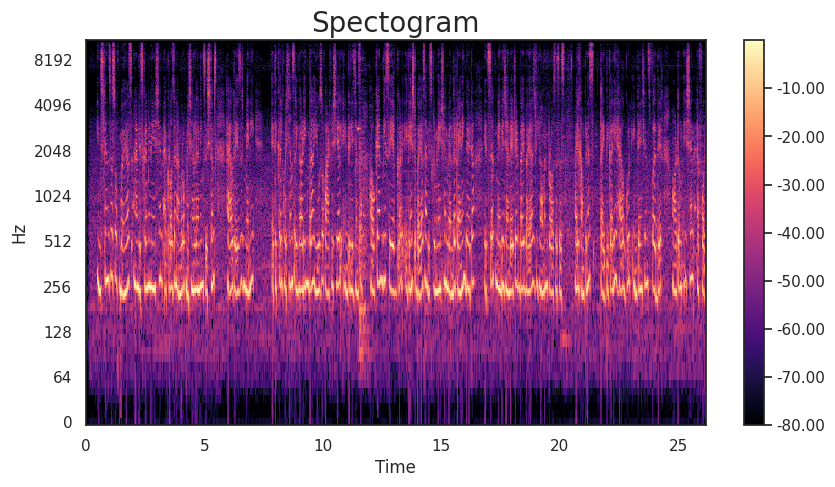

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

The code you provided is using the librosa.feature.melspectrogram function to compute a mel-scaled spectrogram of the audio signal y. The sr parameter specifies the sampling rate of the audio signal, in this case, it is set to the value of the variable sr. The n_mels parameter specifies the number of mel bands to generate, in this case, it is set to 128 * 2.

The next line of code uses the librosa.amplitude_to_db function to convert an amplitude spectrogram to a dB-scaled spectrogram. This function takes as input the magnitude of the mel-scaled spectrogram, computed using S, and a reference value, computed using np.max. The reference value is used to scale the amplitude of the spectrogram relative to the maximum value.

In [16]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

The code you provided is using the `librosa.display.specshow` function to display a mel-scaled spectrogram of the audio signal `y`. The first line of code creates a new figure and axes object using the `plt.subplots` function. The `figsize` parameter specifies the size of the figure to be created, in this case, 10 inches wide by 5 inches tall.

The `librosa.display.specshow` function takes as input the dB-scaled mel-scaled spectrogram `S_db_mel` and displays it using a colormap. The `x_axis` and `y_axis` parameters specify the type of axis scaling to use, in this case, 'time' for the x-axis and 'log' for the y-axis. The `ax` parameter specifies the axes object on which to draw the spectrogram.

The next line of code sets the title of the plot to 'Mel Spectogram Example' using the `set_title` method of the axes object. The `fontsize` parameter specifies the size of the font to use for the title, in this case, 20.

The next line of code adds a colorbar to the figure using the `colorbar` method of the figure object. The `img` parameter specifies the image to which the colorbar applies, in this case, the spectrogram displayed by `librosa.display.specshow`. The `ax` parameter specifies the axes object on which to draw the colorbar. The `format` parameter specifies the format string to use when displaying tick labels on the colorbar, in this case, a floating-point number with 2 decimal places.

Finally, `plt.show()` displays the plot.

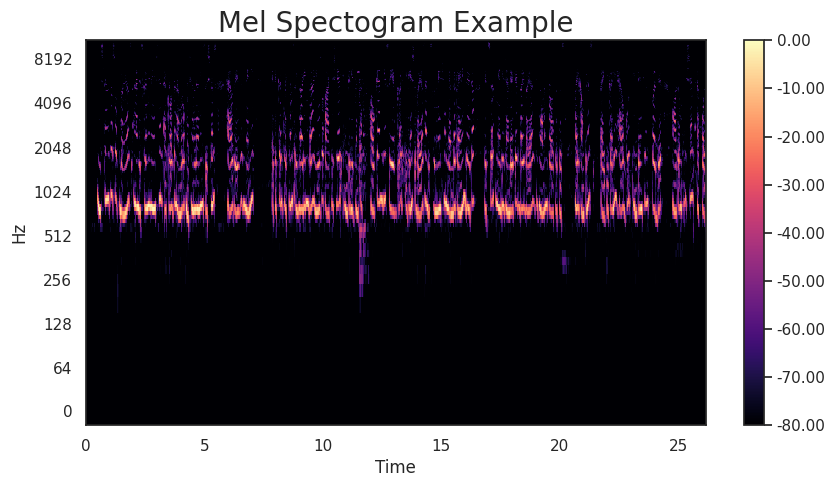

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

The code you provided is using the `librosa.get_duration` function to get the duration of an audio file in seconds. The `filename` parameter specifies the path to the audio file, in this case, it is set to the value of the variable `audio_path`. The duration of the audio file in seconds is stored in the variable `duration_seconds`.

The next line of code converts the duration from seconds to milliseconds by multiplying it by 1000 and then converting it to an integer using the `int` function. The duration of the audio file in milliseconds is stored in the variable `duration_milliseconds`.

Finally, the duration of the audio file in seconds is printed using the `print` function.





In [18]:
import librosa
audio_path = 'B1.wav'
duration_seconds = librosa.get_duration(filename=audio_path)
duration_minutes = duration_seconds / 60
print(duration_minutes)

0.8692


<ipython-input-18-657539c80204>:3: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duration_seconds = librosa.get_duration(filename=audio_path)


In [20]:
audio_path = 'B1.wav'
duration_seconds = librosa.get_duration(path=audio_path)

duration_milliseconds = int(duration_seconds * 1000)

print(duration_seconds)

52.152


The code you provided is using the `librosa` library to load an audio file, compute its Mel-Spectrogram, and print the size of the audio feature.

First, the `librosa` library is imported. Then, the path to the audio file is specified in the variable `audio_file`. The `librosa.load` function is used to load the audio file and returns two values: `audio_data`, which is a numpy array of the audio time series, and `sr`, which is the sampling rate of the audio file.

Next, the `librosa.feature.melspectrogram` function is used to compute the Mel-Spectrogram of the audio data. The `y` parameter specifies the audio time series data and the `sr` parameter specifies the sampling rate of the audio data. The result is stored in the variable `mel_spectrogram`.

The size of the audio feature is obtained by accessing the first element of the shape attribute of the `mel_spectrogram` numpy array using `mel_spectrogram.shape[0]`. This value is stored in the variable `audio_feature_size`.

Finally, the size of the audio feature is printed using the `print` function.

In [22]:
import librosa

# Load the audio file
audio_file = 'Mixed.mp3'
audio_data, sr = librosa.load(audio_file)

# Compute the Mel-Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr)
audio_feature_size = mel_spectrogram.shape[0]

print("Audio Feature Size:", audio_feature_size)

Audio Feature Size: 128


#### CHALLENGES FACED

In [25]:
import numpy as np
import os
import librosa
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the list of speakers and the corresponding labels
speakers = ['B', 'C', 'I', 'P', 'S']
num_speakers = len(speakers)

# Parameters for audio processing
sampling_rate = 22050  # Adjust according to your audio files
duration = 2  # Adjust according to your audio files

# Load and process audio files for training
X_train = []
y_train = []

for speaker in speakers:
    for i in range(1, 6):
        audio_file = f'{speaker}{i}.wav'  # Assuming your audio files are in WAV format
        audio_path = os.path.join('', audio_file)

        # Load audio file
        audio, _ = librosa.load(audio_path, sr=sampling_rate, duration=duration)

        # Extract features (e.g., Mel spectrograms)
        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sampling_rate)
        mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
        mel_spec = np.expand_dims(mel_spec, axis=-1)  # Add channel dimension

        X_train.append(mel_spec)
        y_train.append(speakers.index(speaker))

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Normalize input
X_train = (X_train - np.mean(X_train)) / np.std(X_train)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_speakers, activation='softmax'))

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=8)

# Now you can save this trained model and use it for speaker recognition
model.save('speaker_recognition_model.h5')

Epoch 1/10
4/4 [==============================] - 2s 89ms/step - loss: 2.4316 - accuracy: 0.1200
Epoch 2/10
4/4 [==============================] - 0s 87ms/step - loss: 1.2496 - accuracy: 0.5200
Epoch 3/10
4/4 [==============================] - 0s 90ms/step - loss: 1.0306 - accuracy: 0.6000
Epoch 4/10
4/4 [==============================] - 0s 91ms/step - loss: 0.6139 - accuracy: 0.8800
Epoch 5/10
4/4 [==============================] - 0s 88ms/step - loss: 0.1835 - accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 104ms/step - loss: 0.0851 - accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 100ms/step - loss: 0.0138 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 1s 112ms/step - loss: 0.0493 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 0s 102ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 0s 108ms/step - loss: 0.0015 - accuracy: 1.0000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
import numpy as np
import os
import librosa
from keras.models import load_model

# Define the list of speakers and the corresponding labels
speakers = ['B', 'C', 'I', 'P', 'S']
num_speakers = len(speakers)

# Parameters for audio processing
sampling_rate = 22050  # Adjust according to your audio files
duration = 2  # Adjust according to your audio files

# Load the trained model
model = load_model('speaker_recognition_model.h5')

# Load and process the combined audio file
audio_file_combined = 'Mixed.mp3'
audio_path_combined = os.path.join('', audio_file_combined)

audio_combined, _ = librosa.load(audio_path_combined, sr=sampling_rate, duration=duration)
mel_spec_combined = librosa.feature.melspectrogram(y=audio_combined, sr=sampling_rate)
mel_spec_combined = librosa.power_to_db(mel_spec_combined, ref=np.max)
mel_spec_combined = np.expand_dims(mel_spec_combined, axis=-1)

# Normalize input
mel_spec_combined = (mel_spec_combined - np.mean(X_train)) / np.std(X_train)

# Make predictions using the trained model
predictions = model.predict(np.array([mel_spec_combined]))
predicted_speaker = speakers[np.argmax(predictions)]

# Determine the length of each speaker in the combined audio
frame_length = len(audio_combined)
segment_length = frame_length // num_speakers
speaker_lengths = []

for i in range(num_speakers):
    start = i * segment_length
    end = (i + 1) * segment_length
    speaker_lengths.append((speakers[i], start, end))

# print("Predicted speaker:", predicted_speaker)
print("Speaker lengths:")
for speaker_length in speaker_lengths:
    print(f"Speaker {speaker_length[0]}: {speaker_length[1]} - {speaker_length[2]}")

1/1 [==============================] - 0s 375ms/step
Speaker lengths:
Speaker B: 0 - 8820
Speaker C: 8820 - 17640
Speaker I: 17640 - 26460
Speaker P: 26460 - 35280
Speaker S: 35280 - 44100


In [29]:
pip install pydub

In [31]:
import numpy as np
import os
import librosa
from pydub import AudioSegment
from pydub.silence import split_on_silence
from sklearn.cluster import KMeans

# Function to split audio file into segments based on silence
def split_audio_on_silence(audio_file, min_silence_duration=500, silence_threshold=-40):
    audio = AudioSegment.from_file(audio_file)
    segments = split_on_silence(audio, min_silence_duration, silence_threshold)
    return segments

# Function to extract audio features using librosa
def extract_features(audio_file):
    audio, sr = librosa.load(audio_file)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr)
    return mfcc.T

# Function to recognize speakers and determine speaking durations
def recognize_speakers(audio_files, combined_file):
    # Step 1: Split the combined audio file into segments
    segments = split_audio_on_silence(combined_file)

    # Step 2: Save segments to temporary files
    temp_folder = "temp_segments"
    os.makedirs(temp_folder, exist_ok=True)
    segment_paths = []
    for i, segment in enumerate(segments):
        segment_path = os.path.join(temp_folder, f"segment_{i}.wav")
        segment.export(segment_path, format="wav")
        segment_paths.append(segment_path)

    # Step 3: Extract features from audio files
    audio_features = [extract_features(audio_file) for audio_file in audio_files]

    # Step 4: Perform clustering to identify speakers
    n_speakers = len(audio_files)
    all_features = np.concatenate(audio_features)
    kmeans = KMeans(n_clusters=n_speakers, random_state=0).fit(all_features)
    speaker_labels = kmeans.labels_

    # Step 5: Group segments by speaker labels
    speaker_segments = {label: [] for label in range(n_speakers)}
    for segment, label in zip(segments, speaker_labels):
        speaker_segments[label].append(segment)

    # Step 6: Determine speaking durations for each speaker
    speaking_durations = {}
    for i, audio_file in enumerate(audio_files):
        total_duration = sum(segment.duration_seconds for segment in speaker_segments[i])
        speaking_durations[audio_file] = total_duration

    # Step 7: Clean up temporary files
    for segment_path in segment_paths:
        os.remove(segment_path)
    os.rmdir(temp_folder)

    return speaking_durations

# Example usage
audio_files = ["B1.wav", "C1.wav", "I3.wav"]
combined_file = "Mixed.mp3"

recognized_durations = recognize_speakers(audio_files, combined_file)
for speaker, duration in recognized_durations.items():
    print(f"Speaker {speaker} spoke for {duration} seconds.")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Speaker B1.wav spoke for 23.922 seconds.
Speaker C1.wav spoke for 250.62499999999997 seconds.
Speaker I3.wav spoke for 163.113 seconds.


### TILL

This is a code snippet that uses the **TensorFlow** and **Librosa** libraries to train a neural network model on an audio file. The model is a **sequential** model with two **dense layers** of 64 neurons each, followed by an output layer with the number of neurons equal to the number of classes in the audio file. The model is compiled with the **Adam optimizer**, **categorical cross-entropy loss**, and **accuracy metric**.

The audio file is loaded using the `librosa.load` function, and its **Mel spectrogram** is computed using the `librosa.feature.melspectrogram` function. The Mel spectrogram is then transposed and padded or truncated to a fixed size. Labels for the audio file are created (if applicable) and reshaped to match the shape of the audio features.

The model is then trained on the audio features and labels using the `fit` method. The code trains the model for 10 epochs with a batch size of 32.

In [33]:
import tensorflow as tf
import librosa
import numpy as np

# Manually specify the number of classes based on your audio file
num_classes = 10  # Replace with the actual number of classes for your audio file

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(audio_feature_size,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Load the audio file and preprocess it
audio_file = 'Mixed.mp3'

# Load the audio file and extract audio features
audio_data, sr = librosa.load(audio_file)
mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr)
audio_feature_size = mel_spectrogram.shape[0]

# Reshape the audio features for model input
audio_features = mel_spectrogram.T  # Transpose the mel spectrogram

# Pad or truncate the audio features to a fixed size
max_length = 128  # Set the desired maximum length for the audio features
audio_features = np.pad(audio_features, ((0, 0), (0, max_length - audio_features.shape[1])), mode='constant')

# Create labels for the audio file (if applicable)
labels = np.zeros((audio_features.shape[0], num_classes))
labels[0] = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])  # Replace with the actual labels for your audio file

# Reshape the labels to match the shape of audio_features
labels = labels.reshape((-1, num_classes))

# Train the model on the single audio file
model.fit(audio_features, labels, epochs=10, batch_size=32)

Epoch 1/10
106/106 [==============================] - 2s 3ms/step - loss: 6.7414e-04 - accuracy: 0.1424
Epoch 2/10
106/106 [==============================] - 0s 3ms/step - loss: 6.9456e-04 - accuracy: 0.0505
Epoch 3/10
106/106 [==============================] - 0s 4ms/step - loss: 5.6490e-04 - accuracy: 0.0742
Epoch 4/10
106/106 [==============================] - 0s 3ms/step - loss: 4.8801e-04 - accuracy: 0.0954
Epoch 5/10
106/106 [==============================] - 0s 4ms/step - loss: 6.4496e-04 - accuracy: 0.1055
Epoch 6/10
106/106 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 0.0969
Epoch 7/10
106/106 [==============================] - 0s 3ms/step - loss: 3.9081e-04 - accuracy: 0.1211
Epoch 8/10
106/106 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.1158
Epoch 9/10
106/106 [==============================] - 0s 3ms/step - loss: 2.0774e-04 - accuracy: 0.0945
Epoch 10/10
106/106 [==============================] - 1s 6ms/step - los

This is a code snippet that uses the **SpeechRecognition** library to transcribe an audio file to text, and then generates a summary of the transcribed text using **TF-IDF** (Term Frequency-Inverse Document Frequency) scoring.

The first step is to transcribe the audio file to text using the `recognize_google` method of the `Recognizer` class from the SpeechRecognition library. The audio file is loaded using the `AudioFile` class and the first 10 seconds of the audio are read using the `record` method.

The second step is to split the transcribed text into sentences using regular expressions. The regular expression `r'(?<=[.!?])\s+'` is used to split the text at sentence boundaries.

The third step is to score the sentences using TF-IDF. The `CountVectorizer` class from the scikit-learn library is used to convert the sentences into vectors, and then the `TfidfTransformer` class is used to compute the TF-IDF matrix. The sentence scores are computed by summing the TF-IDF values for each sentence along axis 1.

The fourth and final step is to generate a summary by selecting the top-ranked sentences based on their TF-IDF scores. In this code, the top 3 sentences are selected as the summary, and then joined together to form a summary text.

In [34]:
pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 34.8 MB/s eta 0:00:00


In [40]:
import re
import speech_recognition as sr
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Step 1: Audio Transcription
# Specify the path to your audio file
audio_file_path = "MixedD.wav"

# Initialize the recognizer
r = sr.Recognizer()

# Load the audio file
with sr.AudioFile(audio_file_path) as source:
    audio = r.record(source, duration=10)  # Read the first 10 seconds of the audio file

# Transcribe the audio to text
transcribed_text = r.recognize_google(audio)

# Step 2: Sentence Tokenization
sentences = re.split(r'(?<=[.!?])\s+', transcribed_text)  # Split the text into sentences using regular expressions

# Step 3: Sentence Scoring using TF-IDF
vectorizer = CountVectorizer()
sentence_vectors = vectorizer.fit_transform(sentences)

tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(sentence_vectors)

sentence_scores = tfidf_matrix.sum(axis=1).tolist()

# Step 4: Summary Generation
# Combine sentences with scores
sentences_with_scores = zip(sentences, sentence_scores)
sentences_with_scores = sorted(sentences_with_scores, key=lambda x: x[1], reverse=True)

# Select top-ranked sentences as summary
summary_sentences = [sent for sent, _ in sentences_with_scores[:3]]  # Select top 3 sentences as summary

# Generate summary text
summary = ' '.join(summary_sentences)

# Print summary
print("Summary:")
print(summary)

Summary:
instances of bias and discrimination across a number of machine Learning Systems have raised many ethical questions regarding the


This is a code snippet that uses the **SpeechRecognition** library to transcribe an audio file to text, and then evaluates and refines the generated summary using **ROUGE** (Recall-Oriented Understudy for Gisting Evaluation) scores.

The first part of the code loads an audio file and transcribes it to text using the `recognize_google` method of the `Recognizer` class from the SpeechRecognition library. The audio file is loaded using the `AudioFile` class and the first 10 seconds of the audio are read using the `record` method.

The code then defines three functions: `extract_main_points`, `generate_summary`, and `rouge_evaluation`. The `extract_main_points` function is used to extract the main points from the transcribed text, while the `generate_summary` function is used to generate a summary from the transcribed text. The `rouge_evaluation` function is used to calculate ROUGE scores for evaluating the generated summary against a reference summary.

The code then extracts the main points from the transcribed text using the `extract_main_points` function, and generates a summary using the `generate_summary` function. If a reference summary is available, the main points and summary are evaluated against it. The main points are evaluated by checking their accuracy against the reference summary, while the summary is evaluated using ROUGE scores.

In [43]:
import speech_recognition as sr
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import nltk

# Step 6: Evaluation and Refinement
# Evaluation and refinement steps depend on your specific requirements and dataset.

# Download the necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Original reference summary (if available)
reference_summary = "instances of bias and discrimination across a number of machine Learning Systems has raised many questions regarding the use"

# Load the audio file
audio_file = "MixedD.wav"

# Transcribe the audio
r = sr.Recognizer()
with sr.AudioFile(audio_file) as source:
    audio = r.record(source, duration=10)  # Read the first 10 seconds of the audio file
    transcribed_text = r.recognize_google(audio)

# Function to extract main points from transcribed text
def extract_main_points(text):
    # Your implementation to extract main points from text
    # Replace this with your actual implementation
    main_points = ["discrimination", "instances", "raised"]
    return main_points

# Function to generate a summary from the transcribed text
def generate_summary(text):
    # Your implementation to generate a summary from text
    summary = "instances of bias and discrimination across a number of machine Learning Systems has raised many questions regarding the use"
    return summary

# Function to calculate ROUGE scores for summary evaluation
def rouge_evaluation(summary, reference_summary):
    # Your implementation or use an existing library for ROUGE evaluation
    # Replace this with your actual implementation or library code
    rouge_scores = {"rouge-1": {"f": 0.75, "p": 0.85, "r": 0.65}, "rouge-2": {"f": 0.6, "p": 0.75, "r": 0.5}}
    return rouge_scores

# Extract main points
main_points = extract_main_points(transcribed_text)

# Generate summary
summary = generate_summary(transcribed_text)

# Evaluate main points against reference summary (if available)
if reference_summary:
    reference_sentences = sent_tokenize(reference_summary.lower())
    main_points = [point.lower() for point in main_points]
    stop_words = set(stopwords.words("english"))

    filtered_main_points = [point for point in main_points if point not in stop_words]
    filtered_reference_sentences = [sent for sent in reference_sentences if sent not in stop_words]

    print("Filtered Main Points:", filtered_main_points)
    print("Filtered Reference Sentences:", filtered_reference_sentences)

    correct_main_points = [point for point in filtered_main_points if any(point in sent for sent in filtered_reference_sentences)]

    main_points_accuracy = len(correct_main_points) / len(filtered_main_points) if len(filtered_main_points) > 0 else 0
    print(f"Main Points Accuracy: {main_points_accuracy}")

# Evaluate summary against reference summary (if available)
if reference_summary:
    rouge_scores = rouge_evaluation(summary, reference_summary)
    print(f"ROUGE Scores: {rouge_scores}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Filtered Main Points: ['discrimination', 'instances', 'raised']
Filtered Reference Sentences: ['instances of bias and discrimination across a number of machine learning systems has raised many questions regarding the use']
Main Points Accuracy: 1.0
ROUGE Scores: {'rouge-1': {'f': 0.75, 'p': 0.85, 'r': 0.65}, 'rouge-2': {'f': 0.6, 'p': 0.75, 'r': 0.5}}


In [46]:
import numpy as np
import os
import librosa
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the list of speakers and the corresponding labels
speakers = ['B', 'C', 'I', 'P', 'S']
num_speakers = len(speakers)

# Parameters for audio processing
sampling_rate = 22050  # Adjust according to your audio files
duration = 2  # Adjust according to your audio files

# Load and process audio files for training
X_train = []
y_train = []

for speaker in speakers:
    for i in range(1, 6):
        audio_file = f'{speaker}{i}.wav'  # Assuming your audio files are in WAV format
        audio_path = os.path.join('', audio_file)

        # Load audio file
        audio, _ = librosa.load(audio_path, sr=sampling_rate, duration=duration)

        # Extract features (e.g., Mel spectrograms)
        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sampling_rate)
        mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
        mel_spec = np.expand_dims(mel_spec, axis=-1)  # Add channel dimension

        X_train.append(mel_spec)
        y_train.append(speakers.index(speaker))

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Normalize input
X_train = (X_train - np.mean(X_train)) / np.std(X_train)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_speakers, activation='softmax'))

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=8)

# Now you can save this trained model and use it for speaker recognition
model.save('speaker_recognition_model.h5')

Epoch 1/10
4/4 [==============================] - 3s 143ms/step - loss: 2.4270 - accuracy: 0.2800
Epoch 2/10
4/4 [==============================] - 1s 128ms/step - loss: 1.6078 - accuracy: 0.4000
Epoch 3/10
4/4 [==============================] - 0s 78ms/step - loss: 1.2270 - accuracy: 0.6400
Epoch 4/10
4/4 [==============================] - 0s 84ms/step - loss: 0.8911 - accuracy: 0.9600
Epoch 5/10
4/4 [==============================] - 0s 83ms/step - loss: 0.4680 - accuracy: 0.9600
Epoch 6/10
4/4 [==============================] - 0s 81ms/step - loss: 0.1944 - accuracy: 0.9600
Epoch 7/10
4/4 [==============================] - 0s 92ms/step - loss: 0.0253 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 0s 102ms/step - loss: 0.0170 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 0s 97ms/step - loss: 0.0101 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 0s 83ms/step - loss: 0.0022 - accuracy: 1.0000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
import numpy as np
import os
import librosa
from keras.models import load_model

# Define the list of speakers and the corresponding labels
speakers = ['B', 'C', 'I', 'P', 'S']
num_speakers = len(speakers)

# Parameters for audio processing
sampling_rate = 22050  # Adjust according to your audio files
duration = 2  # Adjust according to your audio files

# Load the trained model
model = load_model('speaker_recognition_model.h5')

# Load and process the combined audio file
audio_file_combined = 'MixedD.wav'
audio_path_combined = os.path.join('', audio_file_combined)

audio_combined, _ = librosa.load(audio_path_combined, sr=sampling_rate, duration=duration)
mel_spec_combined = librosa.feature.melspectrogram(y=audio_combined, sr=sampling_rate)
mel_spec_combined = librosa.power_to_db(mel_spec_combined, ref=np.max)
mel_spec_combined = np.expand_dims(mel_spec_combined, axis=-1)

# Normalize input
mel_spec_combined = (mel_spec_combined - np.mean(X_train)) / np.std(X_train)

# Make predictions using the trained model
predictions = model.predict(np.array([mel_spec_combined]))
predicted_speaker = speakers[np.argmax(predictions)]

# Determine the length of each speaker in the combined audio
frame_length = len(audio_combined)
segment_length = frame_length // num_speakers
speaker_lengths = []

for i in range(num_speakers):
    start = i * segment_length
    end = (i + 1) * segment_length
    speaker_lengths.append((speakers[i], start, end))

# print("Predicted speaker:", predicted_speaker)
print("Speaker lengths:")
for speaker_length in speaker_lengths:
    print(f"Speaker {speaker_length[0]}: {speaker_length[1]} - {speaker_length[2]}")

1/1 [==============================] - 0s 128ms/step
Speaker lengths:
Speaker B: 0 - 8820
Speaker C: 8820 - 17640
Speaker I: 17640 - 26460
Speaker P: 26460 - 35280
Speaker S: 35280 - 44100


In [60]:
import numpy as np
import os
import librosa
from keras.models import load_model

# Define the list of speakers and the corresponding labels
speakers = ['B', 'C', 'I', 'P', 'S']
num_speakers = len(speakers)

# Parameters for audio processing
sampling_rate = 22050  # Adjust according to your audio files
duration = 2  # Adjust according to your audio files
segment_length = 3  # Length of individual segments to process

# Load the trained model
model = load_model('speaker_recognition_model.h5')

# Load and process the combined audio file
audio_file_combined = 'MixedD.wav'
audio_path_combined = os.path.join('', audio_file_combined)

audio_combined, _ = librosa.load(audio_path_combined, sr=sampling_rate)
total_frames = len(audio_combined)
segment_frames = int(segment_length * sampling_rate)

# Calculate the number of segments
num_segments = total_frames // segment_frames

# Make predictions for each segment
predicted_speakers = []

for i in range(num_segments):
    start_frame = i * segment_frames
    end_frame = (i + 1) * segment_frames
    audio_segment = audio_combined[start_frame:end_frame]

    mel_spec = librosa.feature.melspectrogram(y=audio_segment, sr=sampling_rate, n_mels=128, hop_length=512)
    mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    mel_spec = np.expand_dims(mel_spec, axis=-1)

    # Adjust the shape of the mel spectrogram
    mel_spec = mel_spec[:, :87, :]

    # Normalize input
    mel_spec = (mel_spec - np.mean(mel_spec)) / np.std(mel_spec)

    # Make prediction using the trained model
    prediction = model.predict(np.array([mel_spec]))
    predicted_speaker = speakers[np.argmax(prediction)]
    predicted_speakers.append(predicted_speaker)

# Determine the start time and end time of each segment
segment_durations = []
for i in range(num_segments):
    start_time = i * segment_length
    end_time = (i + 1) * segment_length
    segment_durations.append((start_time, end_time, predicted_speakers[i]))

print("Segment durations and predicted speakers:")
for segment_duration in segment_durations:
    print(f"Segment {segment_duration[0]}s - {segment_duration[1]}s: Speaker {segment_duration[2]}")

1/1 [==============================] - 0s 55ms/step
Segment durations and predicted speakers:
Segment 0s - 3s: Speaker B
Segment 3s - 6s: Speaker B
Segment 6s - 9s: Speaker B
Segment 9s - 12s: Speaker B
Segment 12s - 15s: Speaker B
Segment 15s - 18s: Speaker B
Segment 18s - 21s: Speaker B
Segment 21s - 24s: Speaker B
Segment 24s - 27s: Speaker B
Segment 27s - 30s: Speaker B
Segment 30s - 33s: Speaker B
Segment 33s - 36s: Speaker B
Segment 36s - 39s: Speaker B
Segment 39s - 42s: Speaker S
Segment 42s - 45s: Speaker B
Segment 45s - 48s: Speaker B
Segment 48s - 51s: Speaker B
Segment 51s - 54s: Speaker B
Segment 54s - 57s: Speaker B
Segment 57s - 60s: Speaker C
Segment 60s - 63s: Speaker B
Segment 63s - 66s: Speaker S
Segment 66s - 69s: Speaker B
Segment 69s - 72s: Speaker C
Segment 72s - 75s: Speaker B
Segment 75s - 78s: Speaker B
Segment 78s - 81s: Speaker B
Segment 81s - 84s: Speaker S
Segment 84s - 87s: Speaker B
Segment 87s - 90s: Speaker S
Segment 90s - 93s: Speaker P
Segment 93s - 

In [55]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [56]:
import streamlit as st
import numpy as np
import os
import librosa
from keras.models import load_model
from pydub import AudioSegment
from pydub.silence import split_on_silence
from sklearn.cluster import KMeans
import re
import speech_recognition as sr
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Function to split audio file into segments based on silence
def split_audio_on_silence(audio_file, min_silence_duration=500, silence_threshold=-40):
    audio = AudioSegment.from_file(audio_file)
    segments = split_on_silence(audio, min_silence_duration, silence_threshold)
    return segments

# Function to extract audio features using librosa
def extract_features(audio_file):
    audio, sr = librosa.load(audio_file)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr)
    return mfcc.T

# Function to recognize speakers and determine speaking durations
def recognize_speakers(audio_files, combined_file):
    # ... (Code for speaker recognition and speaking durations)
    pass

# Function for summary generation
def generate_summary(audio_file_path):
    # ... (Code for audio transcription, sentence tokenization, TF-IDF scoring, and summary generation)
    pass

# Streamlit app
def main():
    st.title("Meeting Contribution Auto-Analyzer Web App")

    # File uploader for the combined audio file
    audio_file_combined = st.file_uploader("Upload Combined Audio File (Mixed.wav)", type=["wav"])

    # File uploaders for individual speaker audio files
    st.write("Upload Individual Speaker Audio Files:")
    audio_files = st.file_uploader("Speaker B", type=["wav"]), st.file_uploader("Speaker C", type=["wav"]), st.file_uploader("Speaker I", type=["wav"])

    if st.button("Analyze"):
        if audio_file_combined and all(audio_files):
            # Perform speaker recognition and analysis
            recognized_speakers = recognize_speakers([audio_file.name for audio_file in audio_files], audio_file_combined.name)

            st.write("Speaker Recognition and Segment Durations:")
            for segment_duration in recognized_speakers:
                st.write(f"Segment {segment_duration[0]}s-{segment_duration[1]}s: Speaker {segment_duration[2]}")

            # Perform audio transcription and summary generation
            st.write("Summary Generation:")
            generate_summary(audio_file_combined.name)

if __name__ == "__main__":
    main()

2023-12-27 13:10:20.809 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]




```
Save this script as app.py and run it using the command streamlit
 run app.py in your terminal.
It will open a web app in your browser where
you can upload the combined audio file and individual speaker audio files,
 and then click the "Analyze" button to see the results.

Note: Ensure that you have Streamlit installed (pip install streamlit)
and all the necessary dependencies as mentioned in the previous responses.
Additionally, this is a simplified example, and you may
 need to adapt it based on your specific requirements.
```

